# A Preliminary Data Mining on [*Pyvideo*](http://www.pyvideo.org/)

## Introduction to Pyvideo

**__Pyvideo__** is a video index website provides **Python** related videos. It has more than 3000 videos so far. Sadly, this site is going to [*close down at some point this year*](http://bluesock.org/~willkg/blog/pyvideo/status_20160316.html)

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://www.pyvideo.org width=800 height=350></iframe>")

## Site Stats

In [2]:
import os
import json
from pprint import pprint
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

/Users/Shu/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
%matplotlib inline

In [4]:
folders = os.listdir("./data/")

In [5]:
folders = folders[2:]

In [6]:
videopath = []
for i in range(len(folders)):
    a = "./data/" + folders[i] + "/videos/" 
    for j in range(len(os.listdir(path=a))):
        videopath.append(a + os.listdir(path=a)[j])

Have a look at the path 

In [7]:
videopath[:5]

['./data/bostonpy/videos/boston-python-meetup--how-to-test-the-hard-stuff.json',
 './data/bostonpy/videos/boston-python-meetup--testing--where-do-i-start.json',
 './data/chicago-djangonauts/videos/consuming-tasks-with-celery.json',
 './data/chicago-djangonauts/videos/django-based-autocompl.json',
 './data/chicago-djangonauts/videos/django-nonrel-intro-and-state.json']

In [8]:
# How many videos are indexed?
len(videopath)

3587

Have a look at the content of one json file

In [9]:
with open(videopath[1]) as json_data:
    d = json.load(json_data)
pprint(d)

{'category': 'Boston Python Meetup',
 'copyright_text': '',
 'description': 'Testing, Where Do I Start?\n'
                '\n'
                'Presented by Marshall Weir\n'
                '\n'
                'Marshall will cover basic unit test concepts and quickly move '
                'to making your\n'
                'tests motivating, easy to run and adding testing to an '
                "existing project. He's\n"
                'aiming squarely at developers who have projects they want to '
                'use testing for,\n'
                "but don't know where to get started.\n"
                '\n'
                "Have you wanted to become test-infected but couldn't find the "
                'start of the\n'
                'thread to pull? Marshall will help.\n'
                '\n'
                'Boston Python Meetup, May 2010\n'
                '\n',
 'duration': None,
 'id': 592,
 'language': 'English',
 'quality_notes': '',
 'recorded': None,
 'slug': 'boston

From the result above, the json file is in a dictionary format. We are only interested in "title", "description" and "source_url". We will extract these keys' value and store into lists.

In [10]:
with open(videopath[1]) as json_data:
    d = json.load(json_data)["tags"]
", ".join(d)

'bostonpy, session, testing, unittest'

In [11]:
# Extract key from JSON file and convert to string
def extractkeys(key):
    keylist = []
    if key in ["speakers", "tags"]:
        for i in range(len(videopath)):
            with open(videopath[i]) as  json_data:
                keylist.append(", ".join(json.load(json_data)[key]))
    else:
        for i in range(len(videopath)):
            with open(videopath[i]) as json_data:
                keylist.append(json.load(json_data)[key])
    return pd.Series(keylist, name = key.capitalize())

In [12]:
video = pd.concat([extractkeys("title"),extractkeys("recorded"),extractkeys("description"),extractkeys("speakers")
                   ,extractkeys("tags"),extractkeys("category"),extractkeys("source_url"),],axis = 1)

In [13]:
# Convert Recorded value to datetime type
from datetime import datetime
for i in range(len(video)):
    if video["Recorded"][i] != None:
        video["Recorded"][i] == datetime.strptime(video["Recorded"][i], "%Y-%m-%d")

In [14]:
video.head()

,Title,Recorded,Description,Speakers,Tags,Category,Source_url
0,Boston Python Meetup: How to test the hard stuff,None,How to Test the Hard Stuff\n\nPresented by Ste...,Stephan Richter,"bostonpy, session, testing, unittest",Boston Python Meetup,http://vimeo.com/11980200
1,Boston Python Meetup: Testing: Where do I start?,None,"Testing, Where Do I Start?\n\nPresented by Mar...",Marshall Weir,"bostonpy, session, testing, unittest",Boston Python Meetup,http://vimeo.com/11963043
2,Consuming Tasks with Celery,2012-02-02,,Joe Jasinski,RabbitMQ Celery,Chicago Djangonauts,http://youtu.be/MCmNGmFh6wE
3,Django Based Autocompl…,2015-09-03,Django does not do autocomplete out of the box...,Jonathan Bisson,"autocomplete, Django",Chicago Djangonauts,http://youtu.be/XMp-wzzMsls
4,Django-nonrel - intro and state,2012-02-02,,Adam Jenkins,,Chicago Djangonauts,http://youtu.be/akAtm7SnzWg


In [15]:
# Find the range of date of video recorded
print (min([date for date in video["Recorded"] if date != None])
       ,max([date for date in video["Recorded"] if date != None]))

2008-01-01 2015-10-15


### Original videos websites

In [16]:
provider = []
for i in range(len(video["Source_url"])):
    if video["Source_url"][i] == "":
        provider.append(None)
    elif video["Source_url"][i] == None :
        provider.append(None)
    else:
        provider.append(video["Source_url"][i].split("/")[2])

In [17]:
set(provider)

{'blip.tv',
 'archive.org',
 'www.youtube.com',
 'youtu.be',
 'vimeo.com',
 'youtube.com',
 None,
 'video.google.com'}

In [18]:
original = []
for i in range(len(provider)):
    if provider[i] in ["youtu.be",'www.youtube.com','youtube.com']:
        original.append("YouTube")
    elif provider[i] == 'vimeo.com':
        original.append("Vimeo")
    elif provider[i] == 'archive.org':
        original.append("Internet Archive")
    elif provider[i] == 'blip.tv':
        original.append("Bilp TV")
    elif provider[i] == 'video.google.com':
        original.append("Google Video")
    else:
        original.append(None)
video["Original Website"] = pd.Series(original)        

In [19]:
video.describe()

,Title,Recorded,Description,Speakers,Tags,Category,Source_url,Original Website
count,3587,3142,3587,3587,3587,3587,3490,2904
unique,3447,206,1834,1851,862,72,2897,5
top,Lightning Talks,2010-02-19,,,,EuroPython 2011,,YouTube
freq,18,120,1641,599,1912,183,586,2826


In [20]:
video.head()

,Title,Recorded,Description,Speakers,Tags,Category,Source_url,Original Website
0,Boston Python Meetup: How to test the hard stuff,None,How to Test the Hard Stuff\n\nPresented by Ste...,Stephan Richter,"bostonpy, session, testing, unittest",Boston Python Meetup,http://vimeo.com/11980200,Vimeo
1,Boston Python Meetup: Testing: Where do I start?,None,"Testing, Where Do I Start?\n\nPresented by Mar...",Marshall Weir,"bostonpy, session, testing, unittest",Boston Python Meetup,http://vimeo.com/11963043,Vimeo
2,Consuming Tasks with Celery,2012-02-02,,Joe Jasinski,RabbitMQ Celery,Chicago Djangonauts,http://youtu.be/MCmNGmFh6wE,YouTube
3,Django Based Autocompl…,2015-09-03,Django does not do autocomplete out of the box...,Jonathan Bisson,"autocomplete, Django",Chicago Djangonauts,http://youtu.be/XMp-wzzMsls,YouTube
4,Django-nonrel - intro and state,2012-02-02,,Adam Jenkins,,Chicago Djangonauts,http://youtu.be/akAtm7SnzWg,YouTube


In [31]:
# Check a single video information
video.iloc[500]

Title                  Developing cutting-edge applications with PyQt
Recorded                                                   2011-07-18
Description         (Presented with Matteo Bertozzi)\n\nPython's h...
Speakers                             Lorenzo Mancini, Matteo Bertozzi
Tags                                deployment, distributed, pyqt, qt
Category                                              EuroPython 2011
Source_url                 http://www.youtube.com/watch?v=6ko-tO-3bJ0
Original Website                                              YouTube
Name: 500, dtype: object

## Data Visualization

### Wordcloud

We will use **_wordcloud_** package to generate wordcloud for  **Title**, **Description** and **Tags**

In [32]:
import wordcloud as wc
from scipy.misc import imread
import re

**MASK**
![Image of Mask](http://puu.sh/owRnY/7b464d74bd.png)

In [33]:
def getwordcloud(name, stopwords):
    more_stopwords = stopwords
    words = []
    for i in range(len(video[name])):
        words += re.findall(r"[\w]+", video[name][i])
    text = " ".join(words)
    mask = imread("./image/python.png")
    wordcloud = wc.WordCloud(
                      font_path='System/Library/Fonts/MarkerFelt.ttc',
                      stopwords=wc.STOPWORDS.union(more_stopwords),
                      background_color='white',
                      width=1800,
                      height=1400,
                      mask = mask,
                     ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('./image/wordcloud/%s_wordcloud_stopwords(%s).png' % (name,",".join(stopwords)), dpi=500)
    plt.show()

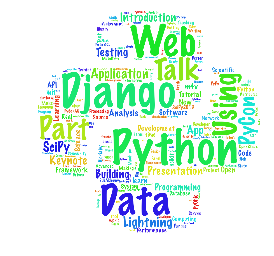

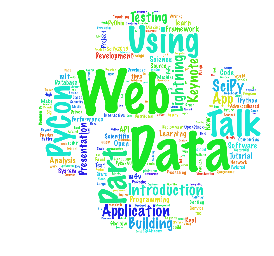

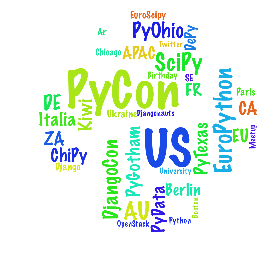

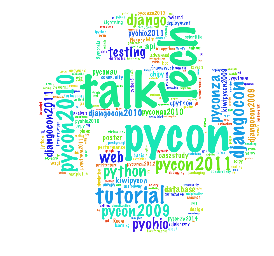

In [100]:
# What's the hottest topic?
getwordcloud("Title",{})
getwordcloud("Title",{"Django","django","Python","python"})
getwordcloud("Category", {})
getwordcloud("Tags", {})

### Top speakers

In [63]:
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('shuwan', "l21vebo6ki")

In [55]:
speakers = []
for i in range(len(video["Speakers"])):
    if video["Speakers"][i] == "":
        continue
    else:
        speakers += video["Speakers"][i].split(", ")
topspeaker = pd.DataFrame(Counter(speakers).most_common(10),columns=["Speaker","Count"])

In [56]:
topspeaker

,Speaker,Count
0,Brandon Rhodes,23
1,Raymond Hettinger,20
2,Alex Gaynor,19
3,David Beazley,15
4,Jessica McKellar,14
5,Mike Müller,13
6,Richard Jones,13
7,Fernando Pérez,13
8,Armin Rigo,12
9,Kenneth Reitz,11


In [178]:
data = [
    go.Bar(
        x=topspeaker["Speaker"],
        y=topspeaker["Count"]
    )
]
py.iplot(data, filename='top speaker')

### Top Tags

In [59]:
tags = []
for i in range(len(video["Tags"])):
    if video["Tags"][i] == "":
        continue
    else:
        tags += video["Tags"][i].split(", ")    
toptags = pd.DataFrame(Counter(tags).most_common(10),columns=["Tags","Count"])

In [60]:
toptags

,Tags,Count
0,pycon,316
1,talk,264
2,Tech,127
3,pycon2010,118
4,tutorial,108
5,djangocon,102
6,pycon2011,99
7,pycon2009,97
8,web,87
9,django,72


In [64]:
data = [
    go.Bar(
        x=toptags["Tags"],
        y=toptags["Count"]
    )
]
py.iplot(data, filename='top tags')

### Top Category

In [113]:
category = []
for i in range(len(video["Category"])):
    if video["Category"][i] in ["", None]:
        continue
    else:
        category += video["Category"][i].split(maxsplit = 0)    
topcategory = pd.DataFrame(Counter(category).most_common(10),columns=["Category","Count"])

In [114]:
topcategory

,Category,Count
0,EuroPython 2011,183
1,PyCon US 2013,182
2,PyCon US 2012,161
3,PyCon US 2014,140
4,SciPy 2013,139
5,PyCon US 2015,134
6,SciPy 2014,123
7,EuroPython 2014,120
8,PyCon US 2010,120
9,PyCon US 2009,100


In [116]:
data = [
    go.Bar(
        x=topcategory.Category,
        y=topcategory.Count
    )
]
py.iplot(data, filename='top category')

### Videos distribution over time

In [98]:
timetable = pd.DataFrame.from_dict(Counter(video["Recorded"]), orient='index').reset_index()
timetable.columns = ["Time", "Count"]
timetable = timetable[timetable.Count != None]
timetable = timetable.sort_values("Time")

In [99]:
data = [
    go.Scatter(
        x=timetable.Time,
        y=timetable.Count
    )
]
py.iplot(data, filename='Pyvideo distribution over time')

## A Simple Recommendation System

There are 8 attributes in our video dataframe. When we do recommendations we only consider the content of the videos. Hence, attributes like *__Source_url__* and *__Original Website__* are irrelevant attributes in our recommendation system. Here *__Recorded__* is not excluded is because when other conditions are the same, we are more interested in the latest video. 

The rest attributes are all descriptive attributes. Some of the attributes are strongly related. For example, *__Tags__* and *__Category__* are strongly related.

Since all attributes are descriptive, we need to extract the key words of each attributes. First, we need to filter some meaningless words, like *__a, you, and, for, with__* and in our case *__python__*.

We will use *__stopwords list__* from *__NLTK__* package to filter meaningless words.

In [40]:
import nltk
from nltk.corpus import stopwords

In [41]:
keyword = len(video)*[1]
for i in range(len(video)):
    key = []
    for j in range(4):
        key += re.findall(r"[\w]+", video.iloc[i][["Title","Description","Tags","Category","Speakers","Recorded"]][j])
    keyword[i] = list(set([word for word in key if word not in stopwords.words("english")]))
keyword = pd.Series(keyword,name="Keyword")

In [42]:
def extractkey(key):
    keylist = []
    for i in range(len(videopath)):
        with open(videopath[i]) as json_data:
            keylist.append(json.load(json_data)[key])
    return pd.Series(keylist, name = key.capitalize())

In [43]:
videoRecommend = pd.concat([keyword, extractkey("speakers"),extractkey("recorded")],axis=1)

In [44]:
for i in range(len(videoRecommend)):
    for j in range(2):
        if videoRecommend.iloc[i][j] == None:
            videoRecommend.iloc[i][j] == []

In [45]:
videoRecommend.head(3)

,Keyword,Speakers,Recorded
0,"[projects, doctest, may, sort, 2010, well, Tes...",[Stephan Richter],None
1,"[projects, He, 2010, start, unittest, move, kn...",[Marshall Weir],None
2,"[Tasks, Celery, Chicago, RabbitMQ, Consuming, ...",[Joe Jasinski],2012-02-02


In [46]:
def getRecommend(idx, number):
    
    keywordScore = []
    speakerScore = []
    totalScore = []
    
    candidate = videoRecommend
    candidate = candidate.drop(idx)
    
    for i in candidate.index:
        keywordScore.append(len(set(videoRecommend["Keyword"][idx]) & set(candidate["Keyword"][i])))
    for i in candidate.index:
        speakerScore.append(len(set(videoRecommend["Speakers"][idx]) & set(candidate["Speakers"][i])))
    totalScore = keywordScore + speakerScore
    top = sorted(totalScore, reverse=True)[:number]
    
    totalScore = pd.Series(totalScore, name = "Total Score")
    Recommend = pd.concat([pd.Series(candidate.index, name = "Index"),totalScore,candidate["Recorded"]],axis =1)
    Recommend = Recommend.sort_values(["Total Score","Recorded"], ascending = False)
    return Recommend[:number]

In [49]:
getRecommend(1234, 5)

,Index,Total Score,Recorded
230,230.0,10,2012-09-06
1234,1235.0,10,NaN
1291,1292.0,9,2015-08-04
949,949.0,9,2014-09-13
1190,1190.0,9,2014-08-11


In [50]:
video.iloc[230]

Title                               About Django from the Pyramid Guy
Recorded                                                   2012-09-06
Description         # About Django from the Pyramid Guy\n\n## Who ...
Speakers                                              Chris McDonough
Tags                                                           django
Category                                               DjangoCon 2012
Source_url                 http://www.youtube.com/watch?v=eN7h6ZbzMy0
Original Website                                              YouTube
Name: 230, dtype: object

## Improvements

*__NTLK__* package currently does not support Chinese. But from the database, I found several videos recoreded from the *__Pycon TW__*, which are using *__Traditional Chinses__*. 